# 02: Cluster analysis: K-means

**Author:** Grace Akatsu

**Class:** CPBS 7602, Fall 2025

---
## Overview
This notebook performs cluster analysis on the GTEx data from notebook 01, using k-means clustering.

## Table of Contents
*   [Import libraries](#import_libraries)
*   [Set paths and seed](#set_paths)
*   [Read in data](#read_data)
*   [Parameter tuning: consensus index method](#consensus_index)
*   [Parameter tuning: elbow method](#elbow)
*   [Visualize with PCA](#pca)
*   [Save model outputs for k=10](#k_10)
---

## Import libraries <a class="anchor" id="import_libraries"></a>

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn import cluster
from sklearn.metrics import adjusted_rand_score as ari
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.patches import Patch

## Set paths and seed <a class="anchor" id="set_paths"></a>

In [2]:
DATA_FILE = "/Users/akatsug/OneDrive - The University of Colorado Denver/CPBS_7602_big_data_in_biomedical_informatics/assignment01/clean_data/gtex_top10_tissues_top5000_variable_genes_standardized.csv"
K_MEANS_OUTPUTS = "/Users/akatsug/OneDrive - The University of Colorado Denver/CPBS_7602_big_data_in_biomedical_informatics/assignment01/k_means_outputs"

os.makedirs(K_MEANS_OUTPUTS, exist_ok=True)

In [3]:
np.random.seed(0)

## Read in data <a class="anchor" id="read_data"></a>

In [4]:
data = pd.read_csv(
    DATA_FILE,
    index_col="SAMPID"
)

data.head()


,Tissue,ENSG00000244734.3,ENSG00000188536.12,ENSG00000198804.2,ENSG00000198938.2,ENSG00000163220.10,ENSG00000198899.2,ENSG00000198886.2,ENSG00000198712.1,ENSG00000143632.14,...,ENSG00000261236.7,ENSG00000188112.8,ENSG00000170035.15,ENSG00000024862.17,ENSG00000213619.9,ENSG00000176087.14,ENSG00000115596.3,ENSG00000138386.16,ENSG00000182872.15,ENSG00000070669.16
SAMPID,,,,,,,,,,,,,,,,,,,,,
GTEX-1117F-0226-SM-5GZZ7,Adipose - Subcutaneous,-0.317682,-0.320624,-0.822484,-0.623593,-0.278153,-0.845429,-0.920044,-0.944370,-0.332153,...,-0.259958,0.087855,0.714803,0.769940,0.143898,-0.476630,-0.245165,-0.547999,-0.027921,-0.037272
GTEX-1117F-0426-SM-5EGHI,Muscle - Skeletal,-0.319849,-0.322180,0.219063,1.660759,-0.278587,1.286640,0.307966,0.663645,1.117576,...,1.470513,-0.589025,-0.033767,-0.572090,0.467826,-0.715005,-0.381079,-1.292842,-0.339644,-1.050707
GTEX-1117F-0526-SM-5EGHJ,Artery - Tibial,-0.319430,-0.321842,-0.872736,-0.647149,-0.278998,-0.710659,-0.839425,-0.911312,-0.332987,...,-0.509545,-0.527738,-0.000939,-0.229877,-0.396138,-1.214898,-0.315997,-0.447965,1.078165,0.048887
GTEX-1117F-2926-SM-5GZYI,Skin - Not Sun Exposed (Suprapubic),-0.320043,-0.321507,-0.525812,-0.609139,-0.276681,-0.633970,-0.646396,-0.870145,-0.332046,...,-0.344541,0.708257,-0.008799,0.094763,-0.049997,-0.492368,-0.070677,1.017824,0.276392,0.139678
GTEX-111CU-0226-SM-5GZXC,Thyroid,-0.321842,-0.323617,-0.064829,0.022578,-0.267405,0.605461,0.046808,0.438473,-0.332147,...,0.941758,0.128075,0.421663,0.986367,0.335941,1.521090,-0.368260,-0.127483,0.448233,5.554269


In [5]:
# Set input
X = data.drop(columns=["Tissue"])
# Set target
y = data["Tissue"]

## Parameter tuning: consensus index method <a class="anchor" id="consensus_index"></a>

Let's use the consensus index method to determine the optimal number of clusters (k) for K-means clustering.

In [ ]:

Ks = range(2, 20)
n_reps = 10
cluster_labels = []
pairwise_ari = []
centroid_positions = {}
stability_scores = []

for k in Ks:
    labels = []
    centroids = []

    for _ in range(n_reps):
        model = cluster.KMeans(n_clusters=k, n_init="auto")
        labels.append(model.fit_predict(X))
        centroids.append(model.cluster_centers_)

    cluster_labels.append(labels)
    centroid_positions[k] = centroids

    # Compute pairwise adjusted Rand index (ARI) for stability
    ari_distances = pdist(labels, metric=ari)
    pairwise_ari.append(ari_distances)
    stability_scores.append(ari_distances.mean())



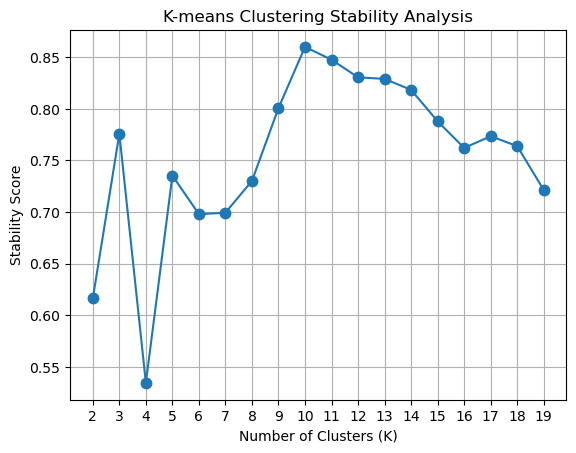

In [ ]:
# Visualize stability scores
plt.plot(Ks, stability_scores, marker=".", linestyle="-", markersize=15)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Stability Score")
plt.grid(True)
plt.xticks(range(Ks[0], Ks[-1] + 1))
plt.title("K-means Clustering Stability Analysis")
plt.show()

We can see that the stability score peaks when K = 10. We are hoping to cluster by tissue type, and there are 10 tissues represented in this data, so this is promising.

## Parameter tuning: elbow method <a class="anchor" id="elbow"></a>

In [ ]:
# Use elbow method to visualize objective (loss) function values for different K values

Ks, objs = range(1, 20), []
for k in Ks:
    model = cluster.KMeans(n_clusters=k, n_init="auto")
    model.fit(X)
    objs.append(-model.score(X) / X.shape[0])

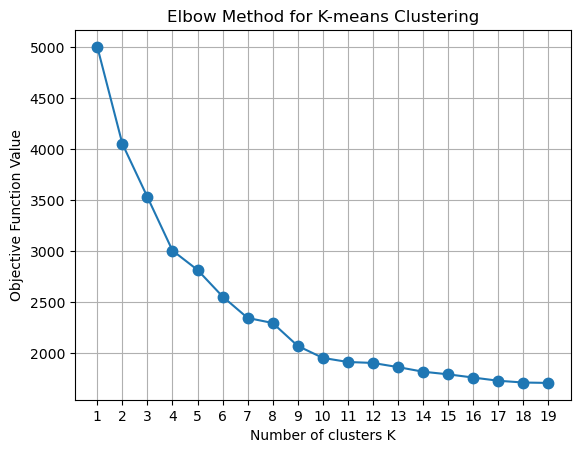

In [ ]:
# Visualize
plt.plot(Ks, objs, ".-", markersize=15)
plt.xlabel("Number of clusters K")
plt.ylabel("Objective Function Value")
plt.title("Elbow Method for K-means Clustering")
plt.grid(True)
plt.xticks(range(Ks[0], Ks[-1] + 1))
plt.show()

The elbow method is subjective, but I see elbows at both 4 and 8. Neither of these corresponds to the number of tissue types we are hoping to capture, which is 10.

## Visualize with PCA <a class="anchor" id="pca"></a>

Visualize with PCA to see where the centroids of the identified clusters are when K = 4, 8, and 10 (candidate K values identified using consensus index and elbow methods).

In [ ]:
# Train models for K = 4, 8, and 10
selected_Ks = [4, 8, 10]

kmeans_models = {}
for k in selected_Ks:
    model = cluster.KMeans(n_clusters=k, n_init="auto")
    model.fit(X)
    kmeans_models[k] = model  

In [ ]:
# Get the cluster centers for K = 4, 8, and 10
centroids_K4 = kmeans_models[4].cluster_centers_
centroids_K8 = kmeans_models[8].cluster_centers_
centroids_K10 = kmeans_models[10].cluster_centers_

In [ ]:
# Perform PCA for visualization 
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X)


In [ ]:
# Project the centroids into PCA space
centroids_K4_pca = pca.transform(centroids_K4)
centroids_K8_pca = pca.transform(centroids_K8)
centroids_K10_pca = pca.transform(centroids_K10)


/Users/akatsug/miniforge3/envs/cu-cpbs-7602/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/Users/akatsug/miniforge3/envs/cu-cpbs-7602/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/Users/akatsug/miniforge3/envs/cu-cpbs-7602/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [ ]:
# Map tissue types to numerical values for coloring
tissues = data["Tissue"].unique().tolist()
tissue_to_num = {t: i for i, t in enumerate(tissues)}
tissue_numbers = data["Tissue"].map(tissue_to_num).tolist()

# Use a colormap with enough distinct colors
cmap = plt.cm.get_cmap("tab20", len(tissues))

# Create legend handles
legend_handles = [
    Patch(facecolor=cmap(i), label=tissues[i])
    for i in range(len(tissues))
]

/var/folders/zw/h2_0x5x52qb4s2lfd9dndll80000gp/T/ipykernel_20468/3754203753.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", len(tissues))


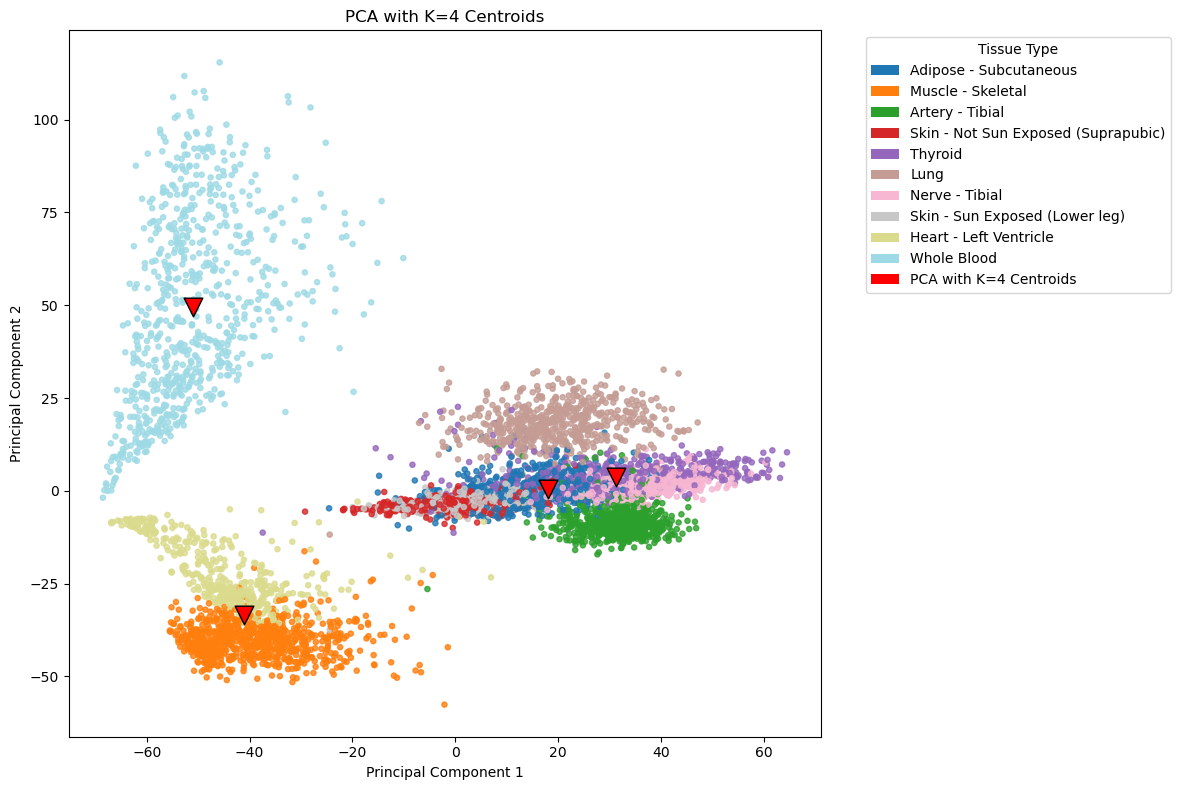

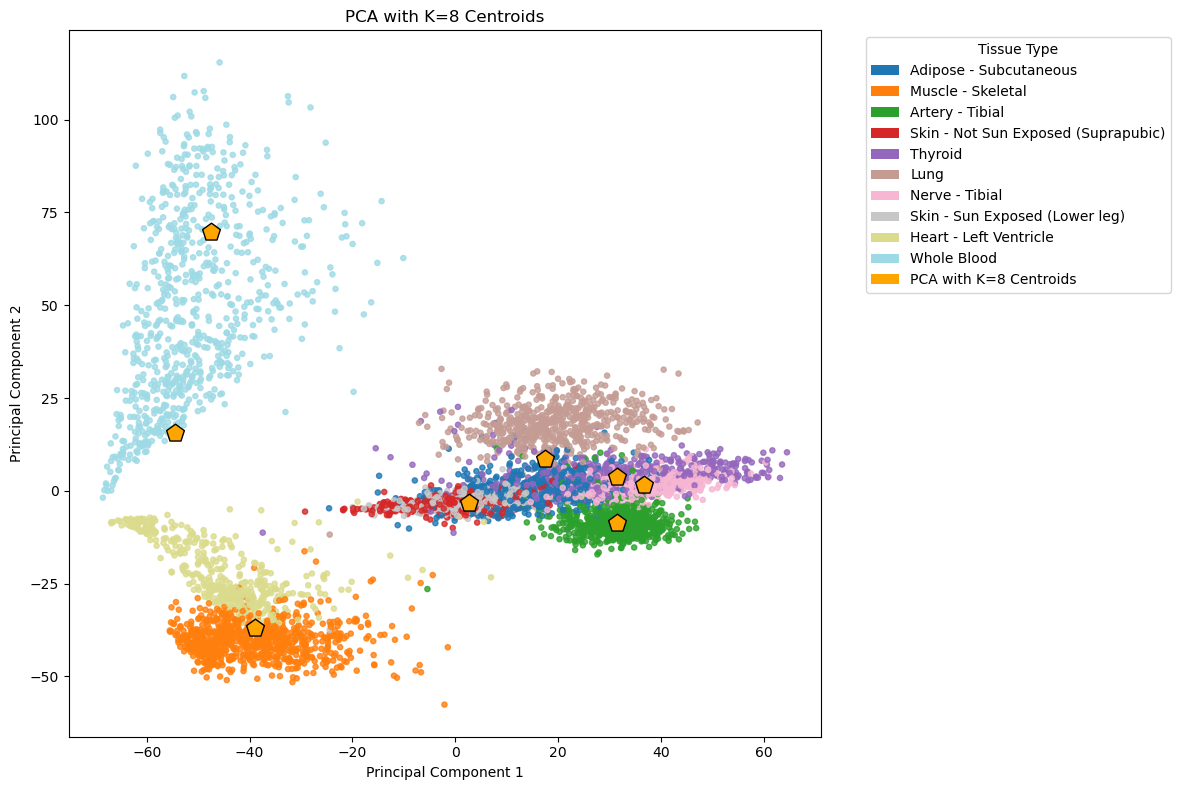

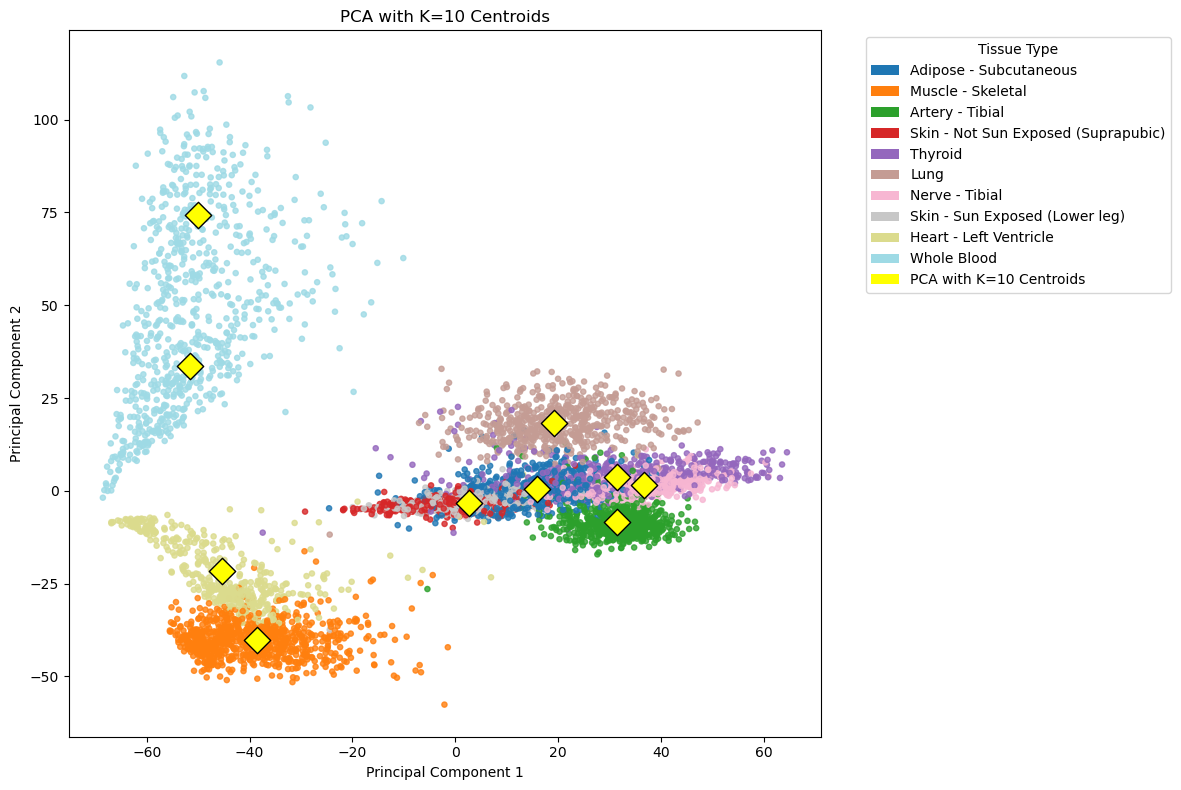

In [ ]:
# Helper function to generate PCA scatter with one centroid set
def plot_pca_with_centroids(centroids, title, centroid_color, marker):
    plt.figure(figsize=(12, 8))
    
    # PCA data points colored by tissue origin
    plt.scatter(
        data_pca[:, 0], data_pca[:, 1],
        c=tissue_numbers, cmap=cmap,
        s=14, alpha=0.8, label="Data Points"
    )
    
    # Plot centroid markers
    plt.scatter(
        centroids[:, 0], centroids[:, 1],
        c=centroid_color, s=180, marker=marker,
        edgecolors="black", label=title
    )
    
    # Add the tissue-type legend
    plt.legend(
        handles=legend_handles + [Patch(facecolor=centroid_color, label=title)],
        bbox_to_anchor=(1.05, 1), loc="upper left",
        title="Tissue Type"
    )

    plt.title(title)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.tight_layout()
    plt.show()

# Plot 1: K=4 Centroids
plot_pca_with_centroids(
    centroids_K4_pca, 
    title="PCA with K=4 Centroids",
    centroid_color="red",
    marker="v"
)

# Plot 2: K=8 Centroids
plot_pca_with_centroids(
    centroids_K8_pca, 
    title="PCA with K=8 Centroids",
    centroid_color="orange",
    marker="p"
)

# Plot 3: K=10 Centroids
plot_pca_with_centroids(
    centroids_K10_pca, 
    title="PCA with K=10 Centroids",
    centroid_color="yellow",
    marker="D"
)


I will go with k=10 as that seems to be what best fits the data based on subjective assessment of PCA visualization (despite possible overfitting - two centroids identified in the single "Whole Blood" tissue cluster).

Let's better visualize the k-10 cluster assignments versus the true tissue types.

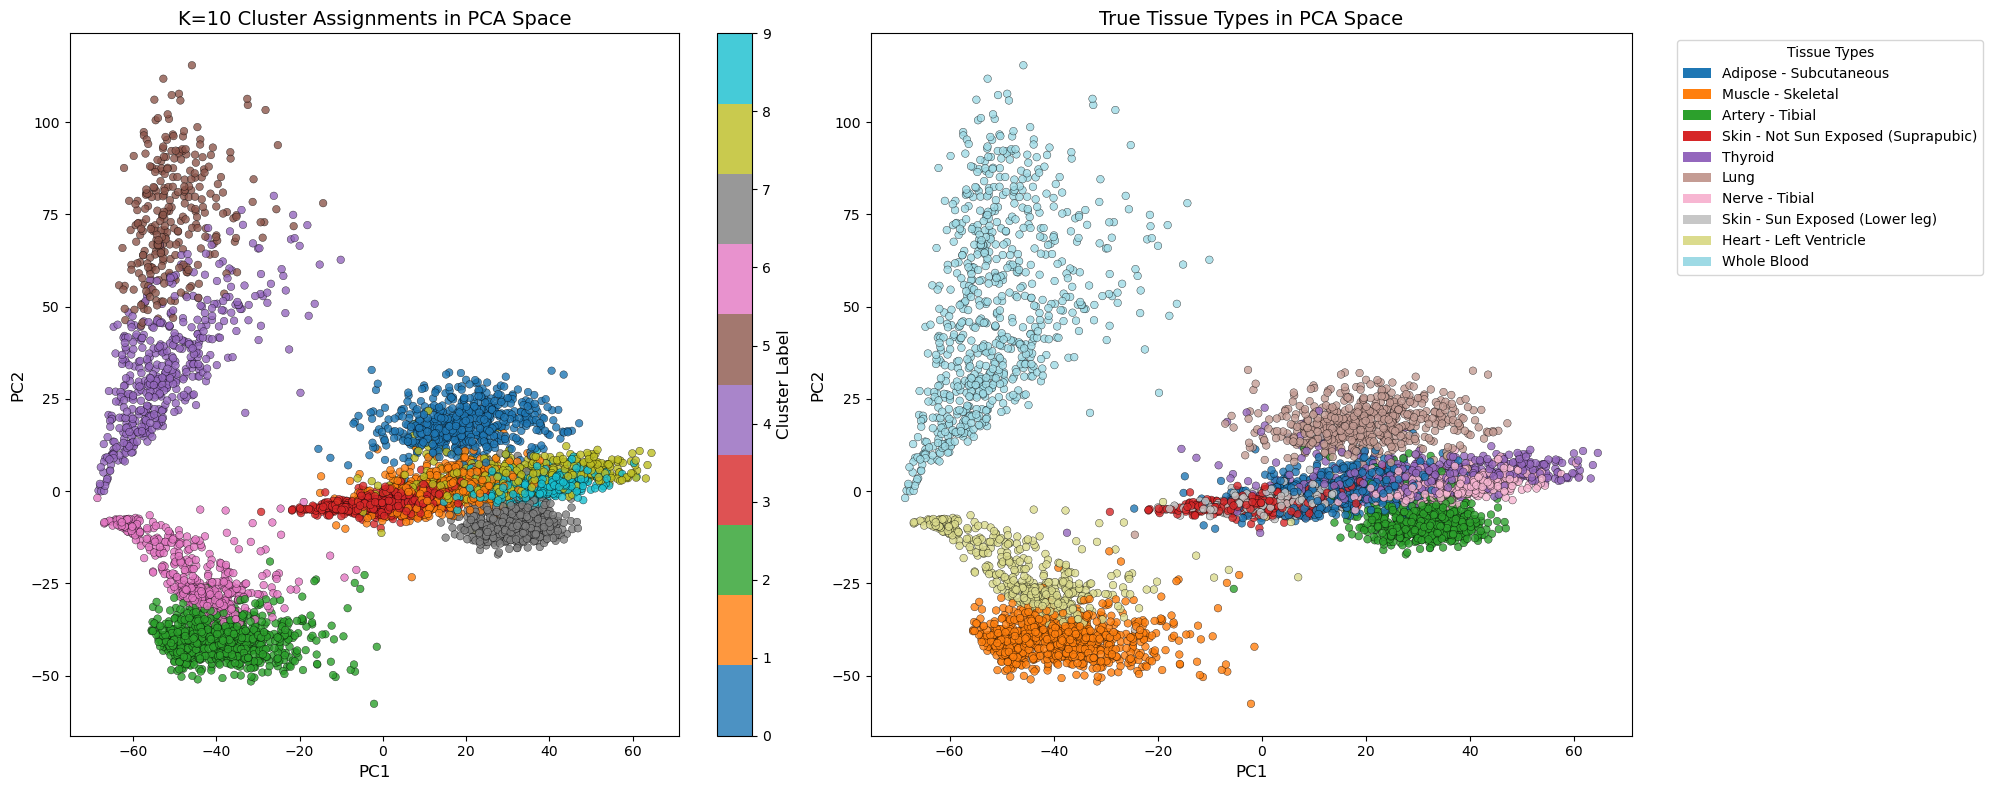

In [ ]:
# Compare K=10 cluster assignments and tissue types in PCA space
kmeans_K10_labels = kmeans_models[10].labels_

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Colored by cluster assignments
scatter1 = ax1.scatter(
    data_pca[:, 0], data_pca[:, 1],
    c=kmeans_K10_labels, cmap="tab10",
    s=30, alpha=0.8, edgecolors='black', linewidth=0.3
)
ax1.set_title("K=10 Cluster Assignments in PCA Space", fontsize=14)
ax1.set_xlabel("PC1", fontsize=12)
ax1.set_ylabel("PC2", fontsize=12)
cbar1 = plt.colorbar(scatter1, ax=ax1)
cbar1.set_label("Cluster Label", fontsize=12)
cbar1.set_ticks(range(10))

# Plot 2: Colored by tissue types
scatter2 = ax2.scatter(
    data_pca[:, 0], data_pca[:, 1],
    c=tissue_numbers, cmap=cmap,
    s=30, alpha=0.8, edgecolors='black', linewidth=0.3
)
ax2.set_title("True Tissue Types in PCA Space", fontsize=14)
ax2.set_xlabel("PC1", fontsize=12)
ax2.set_ylabel("PC2", fontsize=12)

# Add tissue type legend to the second plot
ax2.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc="upper left", title="Tissue Types")

plt.tight_layout()
plt.show()

## Save model outputs for k=10 <a class="anchor" id="k_10"></a>

In [ ]:
# Create a dataframe of K=10 cluster assignments to save
k10_assignments_df = pd.DataFrame({'k10_cluster_assignments': kmeans_K10_labels},
                                  index=X.index)

k10_assignments_df.head()

,k10_cluster_assignemnts
SAMPID,
GTEX-1117F-0226-SM-5GZZ7,1
GTEX-1117F-0426-SM-5EGHI,2
GTEX-1117F-0526-SM-5EGHJ,7
GTEX-1117F-2926-SM-5GZYI,3
GTEX-111CU-0226-SM-5GZXC,8


In [ ]:
#Save K=10 cluster assignments to CSV
k10_assignments_df.to_csv(os.path.join(K_MEANS_OUTPUTS, "kmeans_k10_cluster_assignments.csv"))